# Problem Statement :

In [ ]:
Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years Administration -- spend on administration in the past few years 
Marketing Spend -- spend on Marketing in the past few years State -- states from 
which data is collected Profit -- profit of each state in the past few years

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('50_Startups.csv')

# Data Exploration

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [7]:
df.sample(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
14,119943.24,156547.42,256512.92,Florida,132602.65
24,77044.01,99281.34,140574.81,New York,108552.04
33,55493.95,103057.49,214634.81,Florida,96778.92
6,134615.46,147198.87,127716.82,California,156122.51
27,72107.60,127864.55,353183.81,New York,105008.31


In [8]:
df.shape

(50, 5)

# Quick Data Check

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# Statistical Summary

In [10]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [11]:
df.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

# Data Preprocessing

# Identifying Duplicates

In [12]:
df.duplicated().sum()

0

In [13]:
# There is no duplicate value present in dataset

# Identifying Missing Values

In [14]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [15]:
# There is no missing values in dataset

# Identifying Outliers

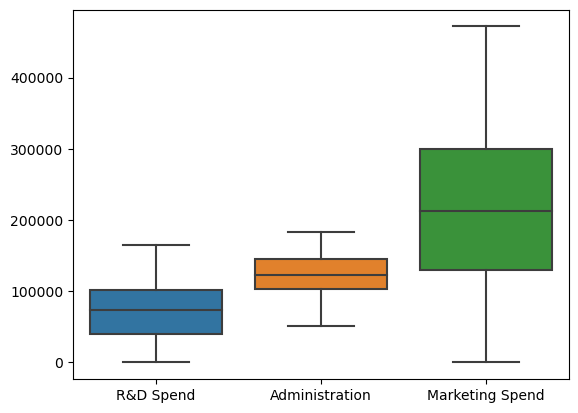

In [16]:
sns.boxplot(data=df.drop('Profit',axis=1));

In [17]:
# With above boxplot we can see there is no outlier present in dataset.

# Data Visualization

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


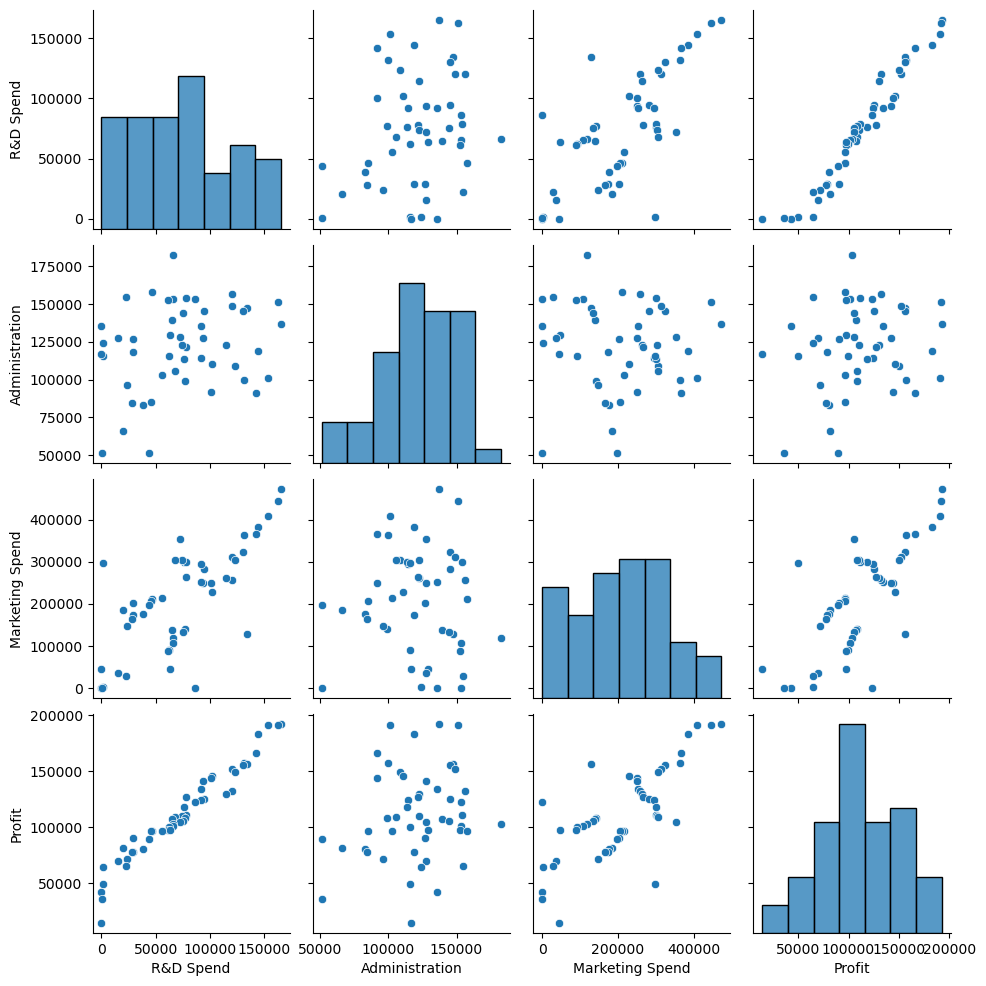

In [18]:
sns.pairplot(df);

In [19]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

<Axes: >

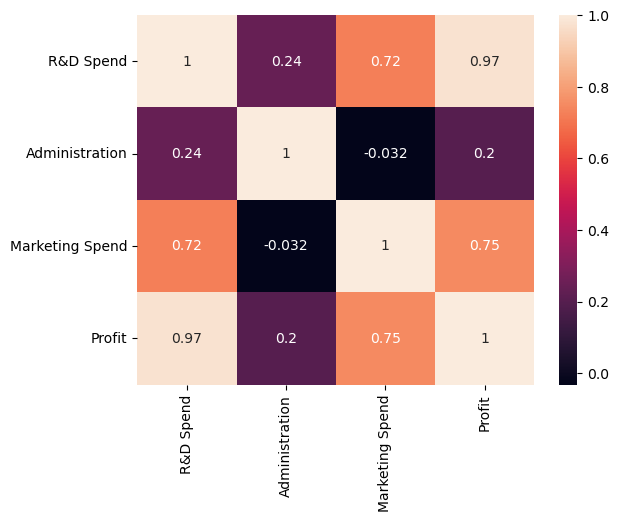

In [20]:
sns.heatmap(df[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']].corr(), annot=True)

In [ ]:
# R&D Spend and Profit: 
There is a weak positive correlation between R&D Spend and Profit, which means that companies that spend more on R&D tend 
to have higher profits, but the correlation is not very strong. This could be because there are many other factors that 
affect profit besides R&D spending.

# Administration and Profit:
There is a very weak positive correlation between Administration and Profit. This means that there is almost no relationship
between how much a company spends on administration and how much profit it makes.

# Marketing Spend and Profit: 
There is a moderate positive correlation between Marketing Spend and Profit.This means thatcompanies that spend more on 
marketing tend to have higher profits, but the correlation is not very strong.This could be because marketing spend is 
just one of many factors that affect profit, and it is difficult to isolate its impact.

# R&D Spend and Administration: 
There is a weak negative correlation between R&D Spend and Administration. This means that companies that spend more on 
R&D tend to spend less on administration, and vice versa. This could be because companies have limited resources and they 
have to make trade-offs between different types of spending.

# Marketing Spend and Administration: 
There is a weak negative correlation between Marketing Spend and Administration.This means that companies that spend more on
marketing tend to spend less on administration, and vice versa.This could be for the same reason as the negative correlation 
between R&D Spend and Administration.

# Marketing Spend and R&D Spend:
There is a very weak positive correlation between Marketing Spend and R&D Spend.This means that there is almost no relationship
between how much a company spends on marketing and how much it spends on R&D.

<Axes: xlabel='Profit', ylabel='Marketing Spend'>

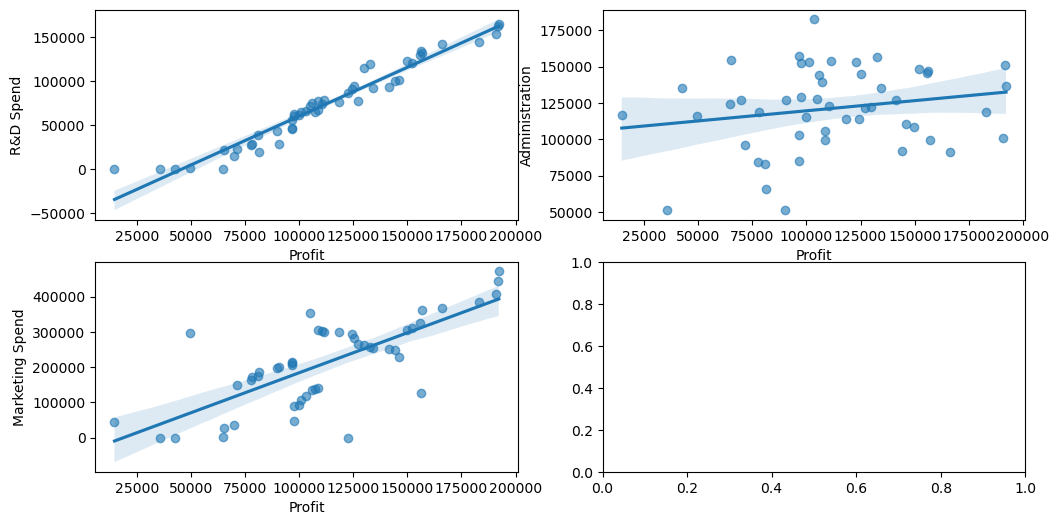

In [25]:
f, axes = plt.subplots(2, 2, figsize=(12,6))

sns.regplot(x = 'Profit', y = 'R&D Spend', data = df, scatter_kws={'alpha':0.6}, ax = axes[0,0])
sns.regplot(x = 'Profit', y = 'Administration', data = df, scatter_kws={'alpha':0.6}, ax = axes[0,1])
sns.regplot(x = 'Profit', y = 'Marketing Spend', data = df, scatter_kws={'alpha':0.6}, ax = axes[1,0])

# Data Splitting

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop("Profit",axis=1)
y = df['Profit']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Encoding

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [30]:
categorical_cols = ["State"]
numeric_cols = ["R&D Spend", "Administration", "Marketing Spend"]

In [31]:
onehot = OneHotEncoder(handle_unknown='ignore')

# Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

# Creating Pipeline

In [34]:
from sklearn.pipeline import Pipeline

In [35]:
numeric_transformer = Pipeline(steps=[('scaler',scaler)])
categorical_transformer = Pipeline(steps=[('onehot',onehot)])

In [36]:
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_cols),
                                               ('cat', categorical_transformer, categorical_cols)])

# Model Selection

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression()

In [39]:
model_pipeline = Pipeline(steps=[('preprocessor',preprocessor),('model',model)])

In [40]:
model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

# Model Evaluation

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
# calculate evalution metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2_1 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2_1)

Mean Absolute Error (MAE): 6961.47781327556
Mean Squared Error (MSE): 82010363.04501371
Root Mean Squared Error (RMSE): 9055.957323497814
R-squared (R2): 0.8987266414319837


# Ridge Model

In [44]:
from sklearn.linear_model import RidgeCV

In [45]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0))

In [46]:
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('ridge_cv_model', ridge_cv_model)])

In [47]:
model_pipeline.fit(X_train, y_train)

ridge_pred = model_pipeline.predict(X_test)

In [48]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, ridge_pred)
mse = mean_squared_error(y_test, ridge_pred)
rmse = mean_squared_error(y_test, ridge_pred, squared=False)
r2_2 = r2_score(y_test, ridge_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2_2)

Mean Absolute Error (MAE): 6981.724257898066
Mean Squared Error (MSE): 82157288.86519419
Root Mean Squared Error (RMSE): 9064.065802121815
R-squared (R2): 0.8985452049559388


In [49]:
ridge_cv_model.coef_

array([37869.30251153, -1806.64110038,  3559.84988358,  -308.68359038,
         595.9757343 ,  -287.29214392])

# LASSO Model

In [50]:
from sklearn.linear_model import LassoCV

In [51]:
lasso_cv_model = LassoCV(eps=0.1, n_alphas=100, cv=5)

In [52]:
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('lasso_cv_model', lasso_cv_model)])

In [53]:
model_pipeline.fit(X_train, y_train)

lasso_pred = model_pipeline.predict(X_test)

In [54]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, lasso_pred)
mse = mean_squared_error(y_test, lasso_pred)
rmse = mean_squared_error(y_test, lasso_pred, squared=False)
r2_3 = r2_score(y_test, lasso_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2_3)

Mean Absolute Error (MAE): 6530.419014731968
Mean Squared Error (MSE): 64869042.30596727
Root Mean Squared Error (RMSE): 8054.132002020284
R-squared (R2): 0.9198941994951274


In [55]:
lasso_cv_model.coef_

array([34740.51016879,    -0.        ,  2136.89596361,    -0.        ,
           0.        ,     0.        ])

# Elastic Net

In [56]:
from sklearn.linear_model import ElasticNetCV

In [57]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=0.001, n_alphas=100, max_iter=1000000)

In [58]:
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('elastic_model', elastic_model)])

In [60]:
model_pipeline.fit(X_train, y_train)

elastic_pred = model_pipeline.predict(X_test)

In [61]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, elastic_pred)
mse = mean_squared_error(y_test, elastic_pred)
rmse = mean_squared_error(y_test, elastic_pred, squared=False)
r2_4 = r2_score(y_test, elastic_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2_4)

Mean Absolute Error (MAE): 6560.489311444285
Mean Squared Error (MSE): 67518259.71835712
Root Mean Squared Error (RMSE): 8216.949538506191
R-squared (R2): 0.9166227209286646


In [62]:
elastic_model.l1_ratio_ 

1.0

In [63]:
elastic_model.alpha_

1000.0313421167232

# R^2 Table

In [65]:
data = {'Model': ['Linear', 'Ridge', 'LASSO', 'Elastic Net'], 'R2 Score': [r2_1, r2_2, r2_3, r2_4]}
df = pd.DataFrame(data)
df


,Model,R2 Score
0,Linear,0.898727
1,Ridge,0.898545
2,LASSO,0.919894
3,Elastic Net,0.916623


# Model Deployment

In [66]:
# from joblib import dump,load

In [67]:
# dump(lasso_cv_model, 'final_lasso_cv_model.joblib')